In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.figsize'] = (15, 15)


Image size :  (730, 1094, 3)
Logo size :  (2436, 2623, 4)


Text(0.5, 1.0, 'TransLogo')

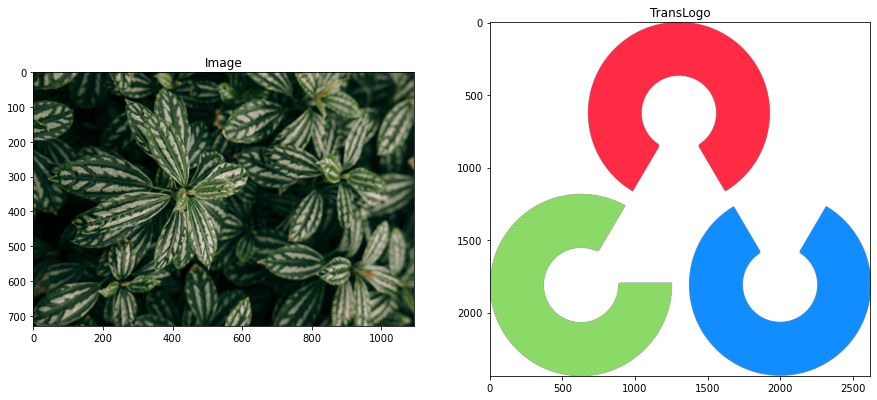

In [2]:
# Read the image and logo.
img = cv2.imread('leaves.jpg', cv2.IMREAD_UNCHANGED)
logo = cv2.imread('opencv_logo.png', cv2.IMREAD_UNCHANGED)

# Check the dimensions, noticing the channel counts.
print('Image size : ', img.shape)
print('Logo size : ', logo.shape)

# For ease of display below, convert to RGBA.
logo_rgba = cv2.cvtColor(logo, cv2.COLOR_BGRA2RGBA)

# Display the images.
plt.figure(figsize=(15,10))
plt.subplot(121); plt.imshow(img[:, :, ::-1]); plt.title('Image');
plt.subplot(122); plt.imshow(logo_rgba);       plt.title('TransLogo')

In [3]:
# Resize the logo to 10% of its original dimensions.
logo = cv2.resize(logo, None, fx = 0.1, fy = 0.1, interpolation = cv2.INTER_LINEAR)

# Retrieve the image and logo shapes.
img_h, img_w, _ = img.shape
logo_h, logo_w, _ = logo.shape

# Print the shape of the resized logo.
print(logo.shape)

(244, 262, 4)


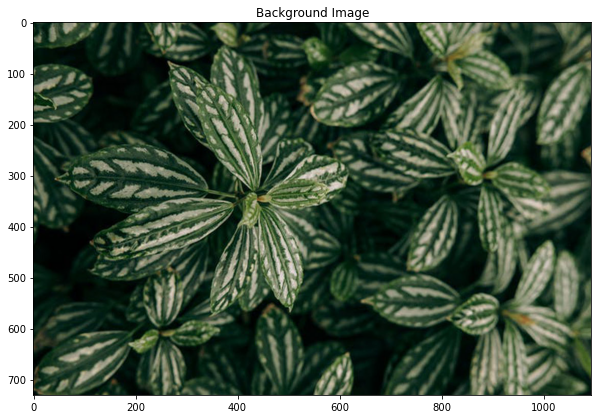

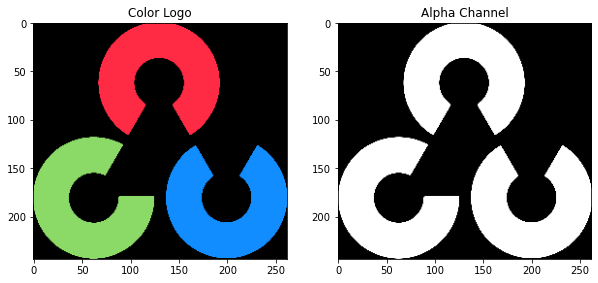

In [4]:
# Separate the color and alpha channels.
logo_bgr   = logo[:, :, 0:3]
logo_alpha = logo[:, :, 3]

# Dispay the images.
plt.figure(figsize = (10, 10))
plt.imshow(img[:, :, ::-1]); plt.title('Background Image');

plt.figure(figsize = (10, 5))
plt.subplot(121); plt.imshow(logo_bgr[:, :, ::-1]);  plt.title('Color Logo');
plt.subplot(122); plt.imshow(logo_alpha);            plt.title('Alpha Channel');

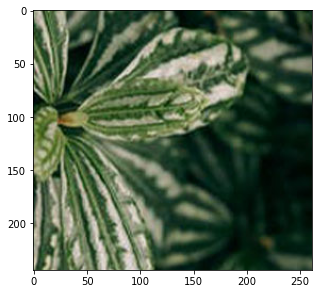

In [6]:


# Cx and Cy are center of the image.
cx = int(img_w/2)
cy = int(img_h/2)

# tlc : top left corner.
tlc_x = int(cx - logo_w/2)
tlc_y = int(cy - logo_h/2)

# brc : bottom right corner.
brc_x = int(cx + logo_w/2)
brc_y = int(cy + logo_h/2)

# Get region of interest from the original image.
roi = img[tlc_y:brc_y, tlc_x:brc_x]

# Display the ROI.
plt.figure(figsize = (5, 5))
plt.imshow(roi[:, :, ::-1]);

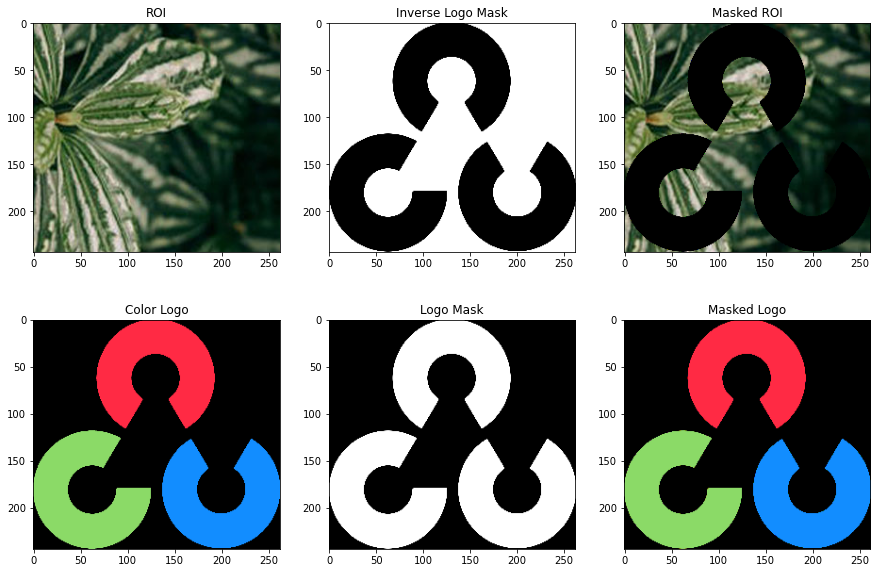

In [7]:
# Make the dimensions of the mask same as the input image.
# Since the background image is a 3-channel image, we create a 3 channel image for the mask.
logo_mask = cv2.merge([logo_alpha, logo_alpha, logo_alpha])

logo_mask_inv = cv2.bitwise_not(logo_mask)

# Use the mask to create the masked ROI region.
masked_roi = cv2.bitwise_and(roi, logo_mask_inv)

# Use the mask to create the masked logo region.
masked_logo = cv2.bitwise_and(logo_bgr, logo_mask)

# Display the intermediate results.
plt.figure(figsize = [15, 10])

plt.subplot(231); plt.imshow(roi[:, :, ::-1]);           plt.title("ROI");
plt.subplot(232); plt.imshow(logo_mask_inv[:, :, ::-1]); plt.title("Inverse Logo Mask");
plt.subplot(233); plt.imshow(masked_roi[:, :, ::-1]);    plt.title("Masked ROI");

plt.subplot(234); plt.imshow(logo_bgr[:, :, ::-1]);      plt.title("Color Logo");
plt.subplot(235); plt.imshow(logo_mask[:, :, ::-1]);     plt.title("Logo Mask");
plt.subplot(236); plt.imshow(masked_logo[:, :, ::-1]);   plt.title("Masked Logo");


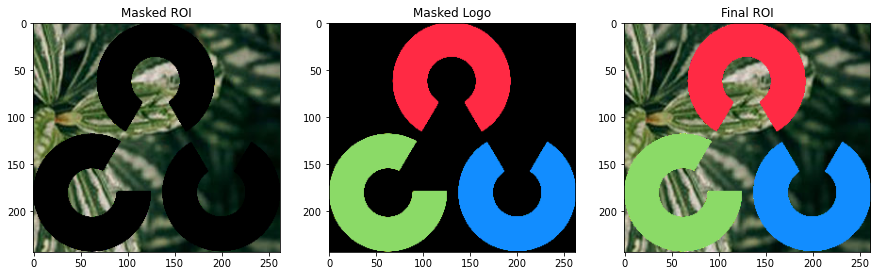

In [8]:
# Combine the masked ROI with the masked logo to get the combined ROI image.
roi_final = cv2.bitwise_or(masked_roi, masked_logo)

# Display the intermediate results.
plt.figure(figsize = [15, 10])

plt.subplot(131); plt.imshow(masked_roi[:,:,::-1]);  plt.title("Masked ROI");
plt.subplot(132); plt.imshow(masked_logo[:,:,::-1]); plt.title("Masked Logo");
plt.subplot(133); plt.imshow(roi_final[:,:,::-1]);   plt.title("Final ROI");

In [9]:
# Create a copy of the roi and image to keep the originals intact.
roi_1 = roi.copy()
img_1 = img.copy()

True

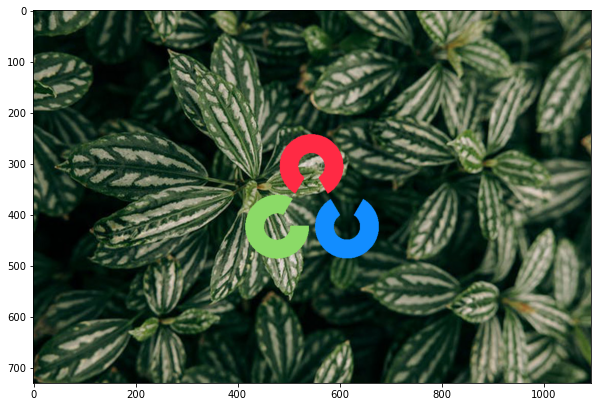

In [10]:
# Insert the ROI patch in the image.
img_1[tlc_y:brc_y, tlc_x:brc_x] = roi_final

# Display the image.
plt.figure(figsize = (10, 10))
plt.imshow(img_1[:, :, ::-1])

# Save the final watermakred image.
cv2.imwrite('watermarked_method_1.jpg', img_1)

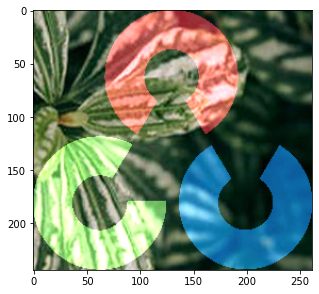

In [16]:
# Make a copy of the ROI.
roi_2 = roi.copy()

# Blend ROI and the logo.
watermarked = cv2.addWeighted(roi_2, 1, logo_bgr, 0.6, 0)

# Display the watermarked ROI.
plt.figure(figsize = (5, 5))
plt.imshow(watermarked[:, :, ::-1]);
# plt.imshow(logo_bgr[:, :, ::-1]);

True

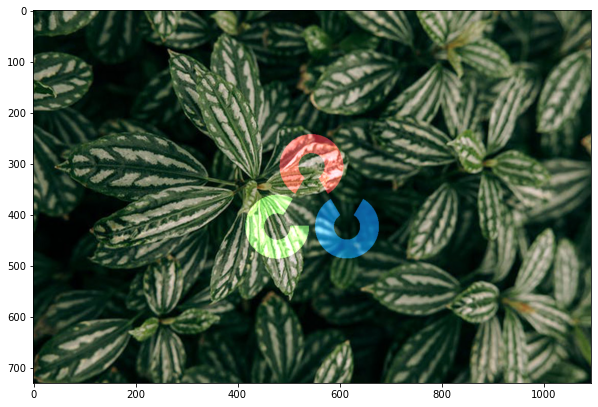

In [14]:
# Make a copy of the image.
img_2 = img.copy()

# Insert the watermarked ROI patch in the image.
img_2[tlc_y:brc_y, tlc_x:brc_x] = watermarked

# display
plt.figure(figsize = (10,10))
plt.imshow(img_2[:,:,::-1]);

# Save the image to the file system.
cv2.imwrite('watermarked_method_2.jpg',img_2)